In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

5


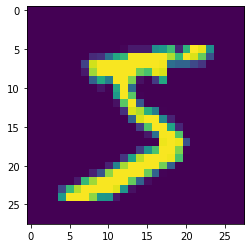

In [2]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

#just for pictorial representation of the data
plt.imshow(x_train[0])
print(y_train[0])

In [3]:
#training set contains 60K images with dimensions of 28x28 with 1 color channel

x_train = x_train.reshape((60000,28,28,1))/255.0 #reshape(no of images, height, width, color channels)
x_test = x_test.reshape((10000,28,28,1))/255.0 
#each pixel contains a value in range(0,255),  we divide each pixel by 255 for easy calculation

#hot encoding the labels
#essential process of converting the categorical data, which in turn improve predictions 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#the labels size would be (no of images, no of outputs)
#in the mnist dataset we have digits in range(0,9) so 10 outputs

In [16]:
#creating a sequential model
#and adding layers to it

model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64,activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))




In [17]:
#training the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 14s 30ms/step - loss: 0.3517 - accuracy: 0.8884
Epoch 2/10
469/469 [==============================] - 14s 30ms/step - loss: 0.1005 - accuracy: 0.9681
Epoch 3/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0730 - accuracy: 0.9772
Epoch 4/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0608 - accuracy: 0.9806
Epoch 5/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0542 - accuracy: 0.9832
Epoch 6/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0461 - accuracy: 0.9851
Epoch 7/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0415 - accuracy: 0.9869
Epoch 8/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0391 - accuracy: 0.9875
Epoch 9/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0356 - accuracy: 0.9885
Epoch 10/10
469/469 [==============================] - 14s 29ms/step - loss: 0.035

In [18]:
#model evaluation
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0270 - accuracy: 0.9910


[0.0270003080368042, 0.9909999966621399]

[[3.0362348e-11 1.4167162e-09 8.0784632e-09 1.3646833e-07 5.0205170e-05
  3.1557054e-10 1.3093762e-13 4.0828370e-04 1.4628502e-06 9.9953997e-01]]
9


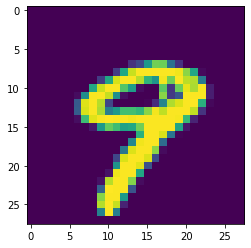

In [19]:
#model prediction
#here the reshape means (batch_size,height,width,color_channels
prediction = model.predict(x_test[9].reshape((1,28,28,1)))

#here the values of probabilites are stored in the prediction variable
#we use argmax function to return the index of max val
print(prediction)
print(np.argmax(prediction))
plt.imshow(x_test[9])

In [20]:
model.save('mnist.h5')